In [2]:
#IMPORTING DEPENDENCIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
plt.style.use(style='ggplot')

In [5]:
training_dataset = pd.read_csv('train_HP.csv')
test_dataset = pd.read_csv('test_HP.csv')
training_dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
training_dataset.shape #to seee the size
training_dataset.SalePrice.describe()#describe the target column 


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

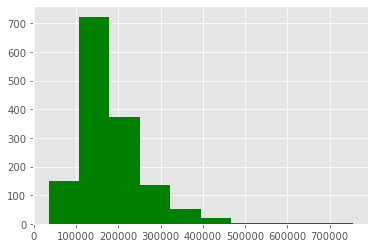

In [13]:
plt.hist(training_dataset.SalePrice,color='green')#fpr bettter intuition -- looks like the outout has been gaussianised 
plt.show()

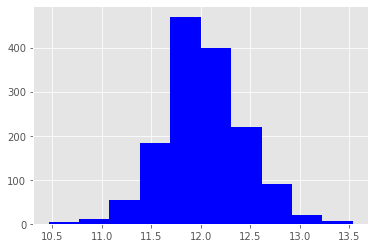

In [16]:
#to make the distribubtion more gaussian like
target=np.log(training_dataset.SalePrice)
plt.hist(target,color='blue')
plt.show()



In [17]:
#extracting numeric features 


numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [21]:
#preprocessing or feature engineering 
#using the correlation of numeric features with the output
corr = numeric_features.corr() #pandas method
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:],'\n')

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



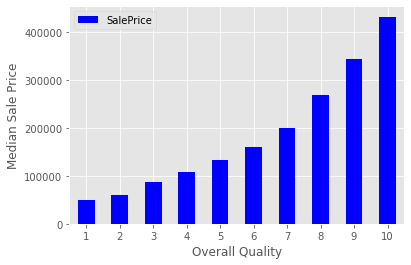

In [26]:
#plotting the correlation between the house price and overall quality 
quality_pivot = training_dataset.pivot_table(index='OverallQual',values = 'SalePrice', aggfunc=np.median)
quality_pivot.plot(kind = 'bar',color = 'blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

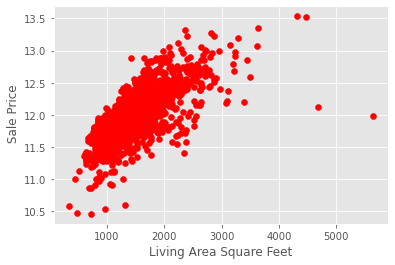

In [32]:
#searching for outliers in the surface area 
plt.scatter(x=training_dataset['GrLivArea'],y=np.log(training_dataset['SalePrice']),color = 'r')
plt.xlabel('Living Area Square Feet')
plt.ylabel(' Sale Price')
plt.show()

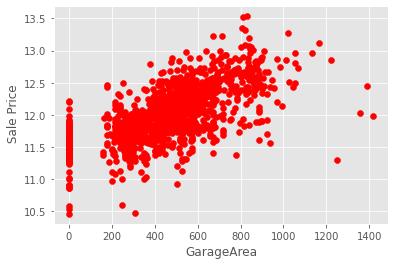

In [33]:
#searching for outliers in the GarageArea
plt.scatter(x=training_dataset['GarageArea'],y=np.log(training_dataset['SalePrice']),color = 'r')
plt.xlabel('GarageArea')
plt.ylabel(' Sale Price')
plt.show()

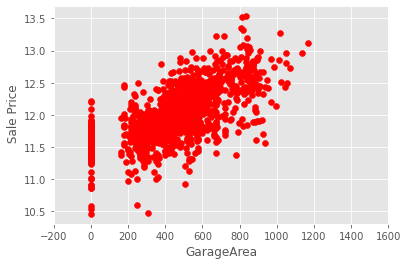

In [39]:
#OUTLIER REMOVAL
#slicing the data
training_dataset = training_dataset[training_dataset['GarageArea']<1200] #slicing the data
plt.scatter(x=training_dataset['GarageArea'],y=np.log(training_dataset['SalePrice']),color = 'r')
plt.xlim(-200,1600) # to ensure the same scale
plt.xlabel('GarageArea')
plt.ylabel(' Sale Price')
plt.show()

In [47]:
#counting missing values i.e NaNs 
nulls = pd.DataFrame(training_dataset.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls
                     

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageYrBlt,81
GarageCond,81
GarageType,81


In [48]:
#TREATING CATEGORICAL DATA 
categoricals = training_dataset.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [50]:
#encoding the categorical data using one hot encoding 
training_dataset['enc_street']=pd.get_dummies(training_dataset.Street,drop_first=True) #specify whether to drop or not 
test_dataset['enc_street']=pd.get_dummies(training_dataset.Street,drop_first=True)
print('Encoded:', '\n')
print(training_dataset.enc_street.value_counts())


Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


In [51]:
#treat missing values by assinging averages 
data=training_dataset.select_dtypes(include=[np.number]).interpolate().dropna() # what does drop na do 
sum(data.isnull().sum()!=0) #to check if missing values still persist

0

In [52]:
#CREATING THE INPUT FOR OUR MODEL
y = np.log(training_dataset.SalePrice)
x=data.drop(['Id','SalePrice'],axis=1) #creating the dataset


In [53]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3) #test is actually validation here

In [57]:
#BUILDING THE MODEL AND FITTING 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 


lr = linear_model.LinearRegression()
model=lr.fit(X_train,y_train)



In [61]:
print("R^2 score is : \n",model.score(X_test,y_test))
predictions=model.predict(X_test)
print("RMSE is : \n",mean_squared_error(y_test,predictions))


R^2 score is : 
 0.8875183697245659
RMSE is : 
 0.017391505338429133


<function matplotlib.pyplot.show(close=None, block=None)>

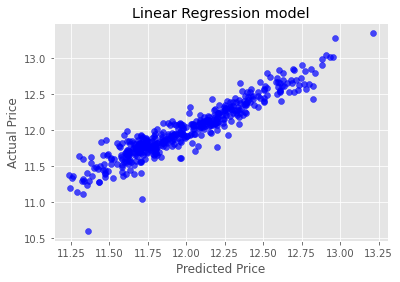

In [62]:
#to visualise the performance
actual_values=y_test
plt.scatter(predictions,actual_values,alpha=.7,color='b') # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression model')
plt.show

In [76]:
#SUBMISSION -  applying the model
#creating the data frame
submission = pd.DataFrame()
submission['Id'] = test_dataset.Id
feats = test_dataset.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()
predictions=model.predict(feats)
#converting back to norm
final_predictions = np.around(np.exp(predictions),7) # to specify decimal points 

print('Original predictions are: \n', predictions[:5], '\n')
print('Final predictions are: \n', final_predictions[:5], '\n')

submission['SalePrice'] = final_predictions

submission.head(5)

Original predictions are: 
 [11.75771357 11.69565273 12.07596932 12.20781588 12.11574211] 

Final predictions are: 
 [127735.0626476 120048.6944808 175600.9417667 200348.9505405
 182725.8292882] 



,Id,SalePrice
0,1461,127735.062648
1,1462,120048.694481
2,1463,175600.941767
3,1464,200348.950540
4,1465,182725.829288


In [77]:
submission.to_csv('submission1.csv', index = False)